In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math


In [97]:
init_t = 1.0
s = 1000
n = 1000
k_max = 130
k_fact_arr =  np.empty(k_max, dtype=object)

def uniform_init():
    return np.random.uniform(0.0, init_t, n)


def exp_init():
    return np.random.exponential(1, n) * init_t


def uniform_t(k, m_k):
    return math.pow((k + 1) * m_k, 1 / k)


def exp_t(k, m_k):
    return math.pow(m_k / k_fact_arr[k], 1 / k)


def g_sum(arr, k):
    res = 0
    for i in range(1, n):
        res += math.pow(arr[i], k)
    return res


def count_sd(t_arr):
    res = 0
    for i in range(1, s):
        res += math.pow((t_arr[i] - init_t), 2)
    return math.sqrt(res * (1 / n))


def k_fact():
    for k in range(1, k_max):
        k_fact_arr[k] = math.factorial(k)

# flag == 0 => uniform
# flag == 1 => exp
def process(flag):
    sd = np.empty(k_max, dtype=object)
    for k in range(1, k_max):
        t_arr = np.empty(s, dtype=object)
        for j in range(0, s):
            m_k_arr = np.empty(s, dtype=object)
            if flag == 0: var_arr = uniform_init()
            else: var_arr = exp_init()
            m_k_arr[k] = 1 / n * g_sum(var_arr, k)
            if flag == 0: t_arr[j] = uniform_t(k, m_k_arr[k])
            else: t_arr[j] = exp_t(k, m_k_arr[k])
        sd[k] = count_sd(t_arr)
    return sd


def plot_uniform():
    k_fact()
    sd = process(0)
    plt.plot(sd)
    plt.title('uniform distribution parameter dependency')
    plt.draw()
    plt.show()


def plot_exp():
    k_fact()
    sd = process(1)
    plt.plot(sd)
    plt.title('exponential distribution parameter dependency')
    plt.draw()
    plt.show()

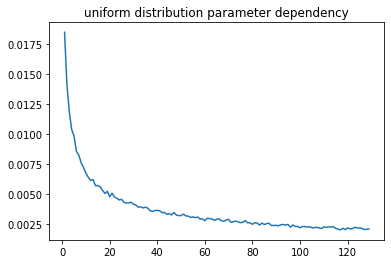

In [98]:
plot_uniform()

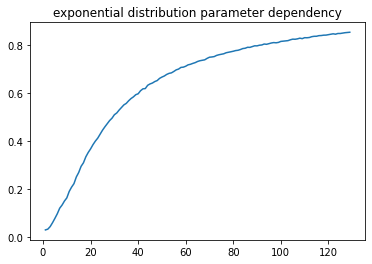

In [99]:
plot_exp()